In [19]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist=keras.datasets.fashion_mnist
(t_images,t_labels),(test_images,test_labels)=fashion_mnist.load_data()## split automatically
name_class= ['Trouser', 'Shirt', 'T-shirt/top' ,  'Dress', 'Coat','Ankle boot',
               'Sandal','Sneaker', 'Bag', 'Pullover',]
t_images=t_images/255
test_images=test_images/255




**Neural Network Formation**



In [20]:
model= keras.Sequential(
    [keras.layers.Flatten(input_shape=(28,28)),## input ---->> flatten all the pixel in 28*28
    keras.layers.Dense(128,activation='relu'),## hidden 1st-->> why 128 --->>
    keras.layers.Dense(10,activation='softmax')]## output layer -->> softmax (all sums up to 1)
)

model.compile(optimizer='adam',## adam is gradient descent algo used to do that
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


*Fitting the data --->> by training set *

In [23]:
## training the model;
model.fit(t_images,t_labels,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3723 - accuracy: 0.8650
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3364 - accuracy: 0.8766
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3130 - accuracy: 0.8858
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.8925
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2809 - accuracy: 0.8964
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.9006
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2563 - accuracy: 0.9046
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2481 - accuracy: 0.9075
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2395 - accuracy: 0.9102
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.232

** Testing on the test images and its Accuracy**

In [24]:
tested_loss,test_accuracy=model.evaluate(test_images,test_labels,verbose=1)
print(test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8853
0.8852999806404114


HERE user can check the guessing power of our model


Pick a number: 1
1/1 [==============================] - 0s 265ms/step

 
*******************************************************************
<-------------IMAGE YOU SELECTED TO PREDICT------------------->
*******************************************************************


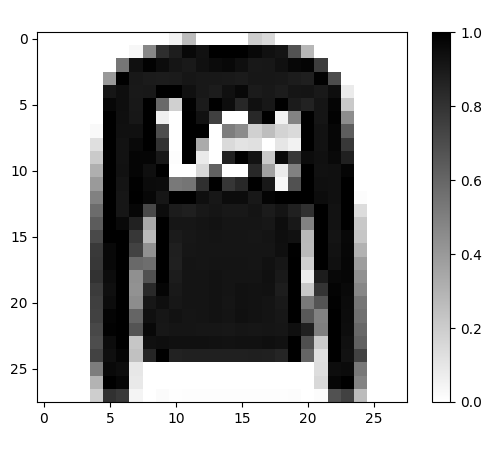

*******************************************************************
THE ACTUAL CLASS OF THE IMAGE :- Pullover
*******************************************************************
THE PREDICTED CLASS OF THE IMAGE:- Pullover
*******************************************************************


In [25]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  print("\n ")
  print("*******************************************************************")
  print("<-------------IMAGE YOU SELECTED TO PREDICT------------------->")
  print("*******************************************************************")
  show_image(image, class_names[correct_label], predicted_class)
  print("*******************************************************************")
  print("THE ACTUAL CLASS OF THE IMAGE :-",class_names[correct_label])
  print("*******************************************************************")
  print("THE PREDICTED CLASS OF THE IMAGE:-",predicted_class)
  print("*******************************************************************")





def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)